In [3]:
import pandas as pd
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [5]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [7]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [9]:
ev_data = ev_data.dropna()

C:\Users\ayesh\AppData\Local\Temp\ipykernel_12952\966028543.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adopt_by_year.index, y=ev_adopt_by_year.values,palette="viridis")


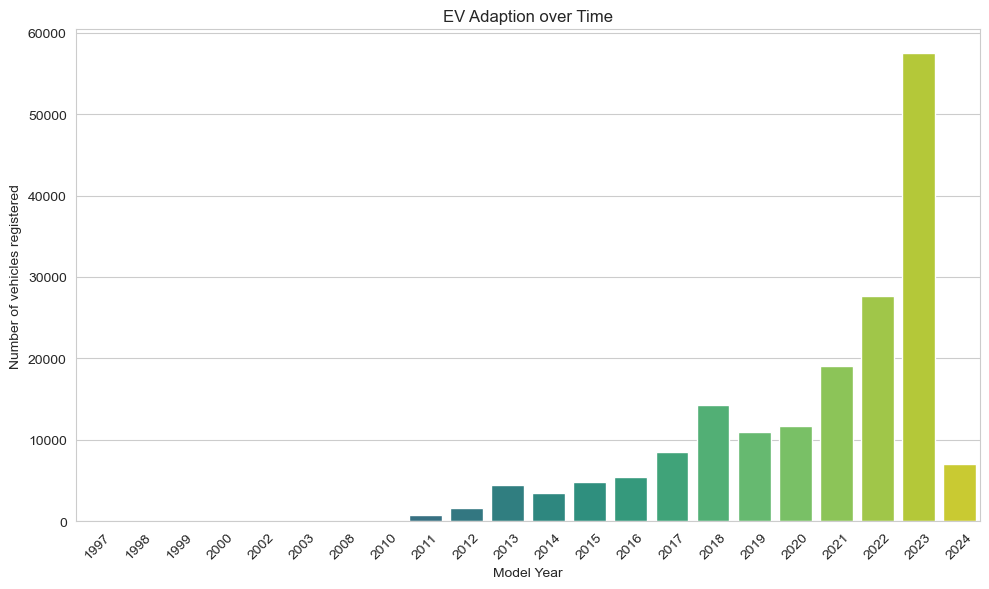

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
ev_adopt_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adopt_by_year.index, y=ev_adopt_by_year.values,palette="viridis")
plt.title('EV Adaption over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of vehicles registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


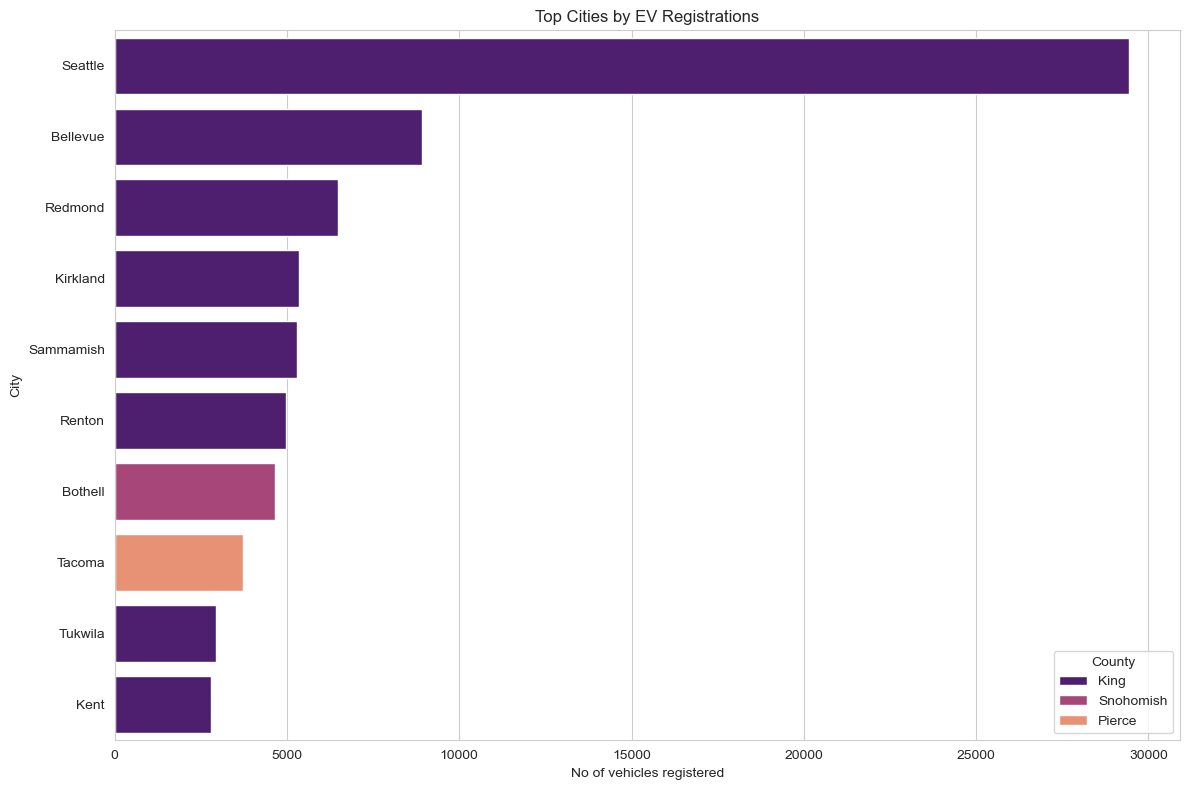

In [13]:
# distribution at county level
ev_county_distr = ev_data['County'].value_counts()
top_counties = ev_county_distr.head(3).index

#filtering for top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

#distribution of EVs in these top counties
ev_city_distr_top = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

#top 10 cities across these counties
top_cities = ev_city_distr_top.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data = top_cities,palette= "magma")
plt.title('Top Cities by EV Registrations')
plt.xlabel('No of vehicles registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

C:\Users\ayesh\AppData\Local\Temp\ipykernel_12952\2008630964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distr.values, y=ev_type_distr.index, palette="rocket")


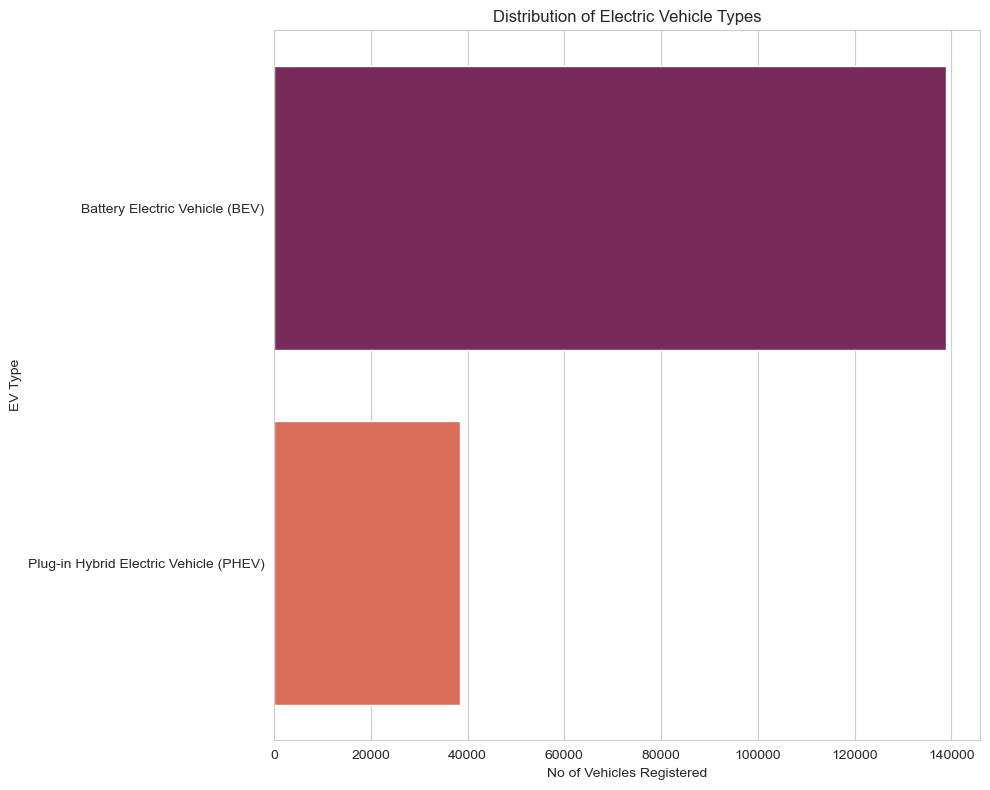

In [15]:
ev_type_distr = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,8))
sns.barplot(x=ev_type_distr.values, y=ev_type_distr.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('No of Vehicles Registered')
plt.ylabel('EV Type')
plt.tight_layout()
plt.show()

C:\Users\ayesh\AppData\Local\Temp\ipykernel_12952\1932134550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distr.values, y=ev_make_distr.index, palette="cubehelix")


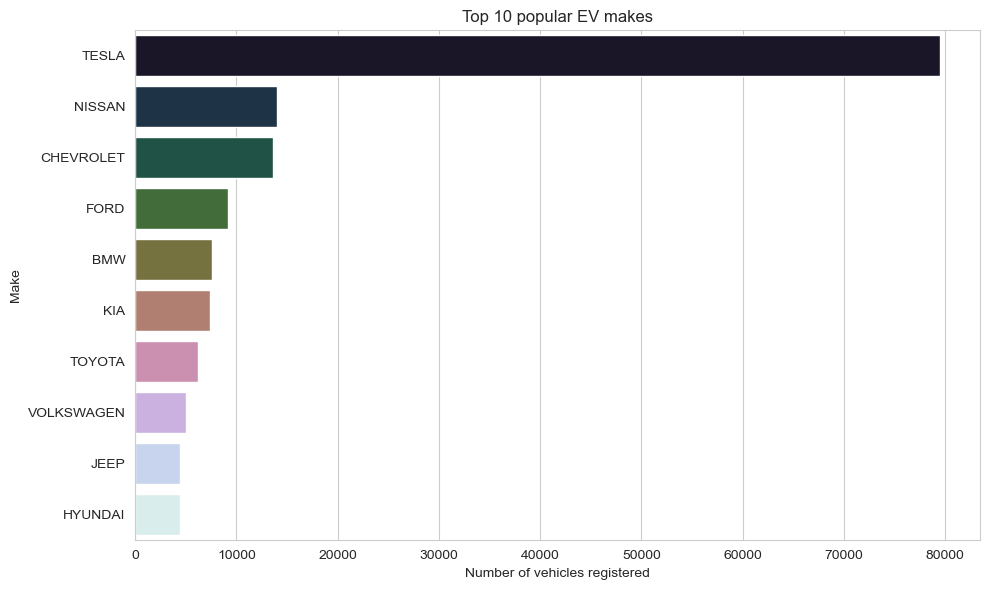

In [17]:
#analysing the popularity of EV manufacturers
ev_make_distr = ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=ev_make_distr.values, y=ev_make_distr.index, palette="cubehelix")
plt.title('Top 10 popular EV makes')
plt.xlabel('Number of vehicles registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

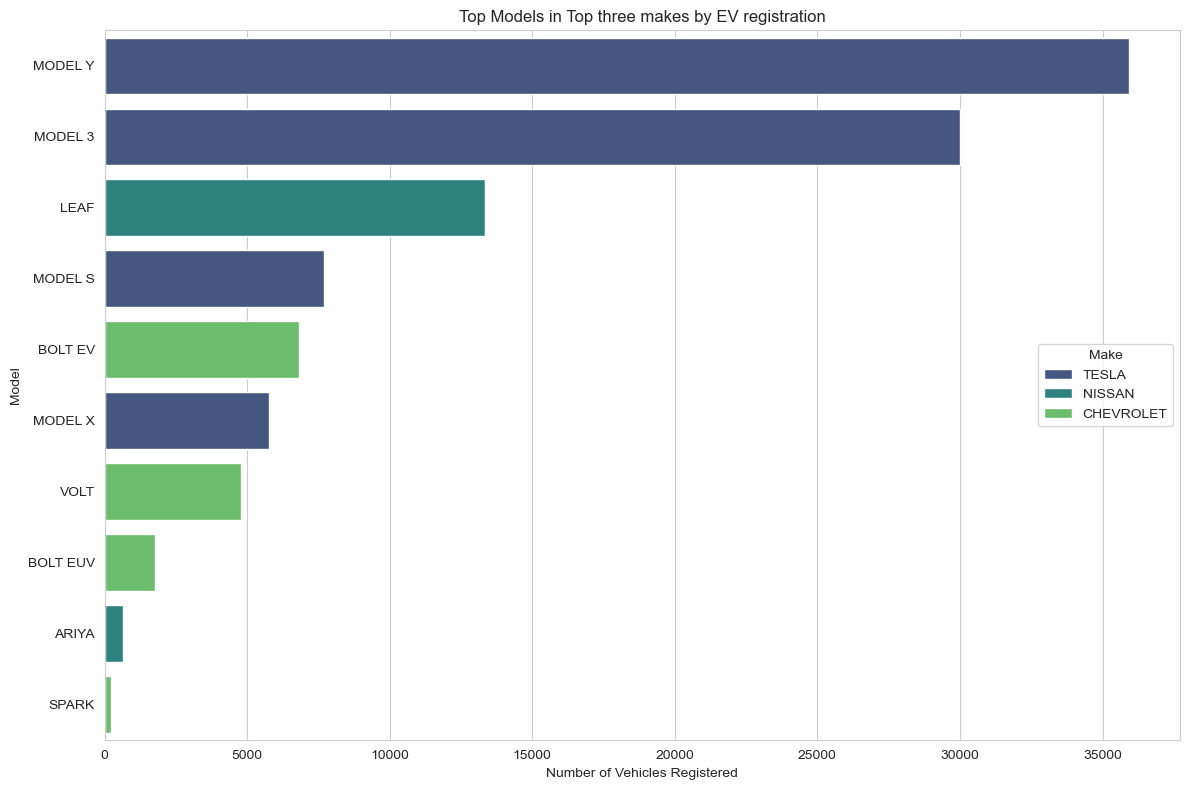

In [19]:
#Select the top 3 manufacturers based on no. of vehicles registered
top_3_makes = ev_make_distr.head(3).index

#Filtering for the top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

#analyse the popularity of EV models in these top manufacturers
ev_model_distr_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

#visualising the top 10 models accross these top manufacturers
top_models = ev_model_distr_top_makes.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top three makes by EV registration')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

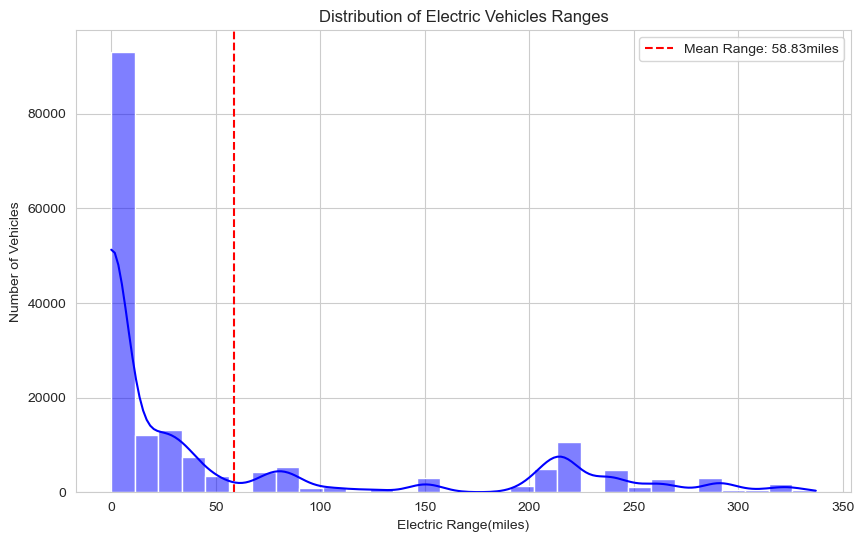

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='blue')
plt.title('Distribution of Electric Vehicles Ranges')
plt.xlabel('Electric Range(miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f}miles')
plt.legend()
plt.show()

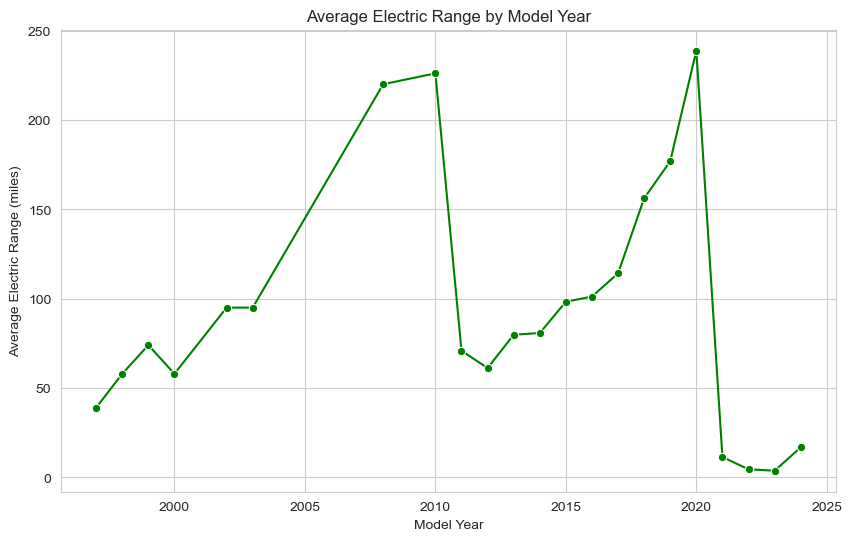

In [23]:
#calculating the average electric range by model year
avg_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Model Year', y='Electric Range', data=avg_range_by_year, marker='o',color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

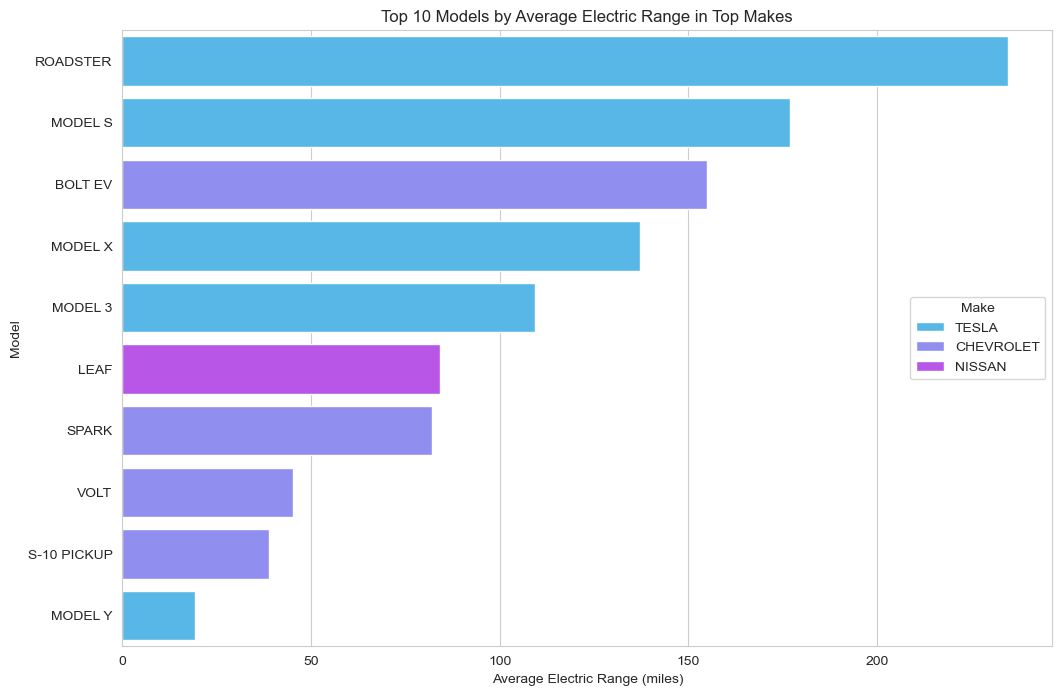

In [25]:
avg_range_per_model = (top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index())

# Select the top 10 models with the highest average electric range
top_10_models = avg_range_per_model.iloc[:10]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_10_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [29]:
# calculate the number of EVs registered each year
ev_regis_counts = ev_data['Model Year'].value_counts().sort_index()
ev_regis_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [49]:
from scipy.optimize import curve_fit
import numpy as np

#filter the data  to include years with complete data, assuming 2023 is
filtered_years = ev_regis_counts[ev_regis_counts.index <= 2023]

#deifining a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b* x)

#prepare data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

#fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

#use the function to forecast the number of EV's for 2024 and the next year
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

#creating a dictionary for the forecasted values
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


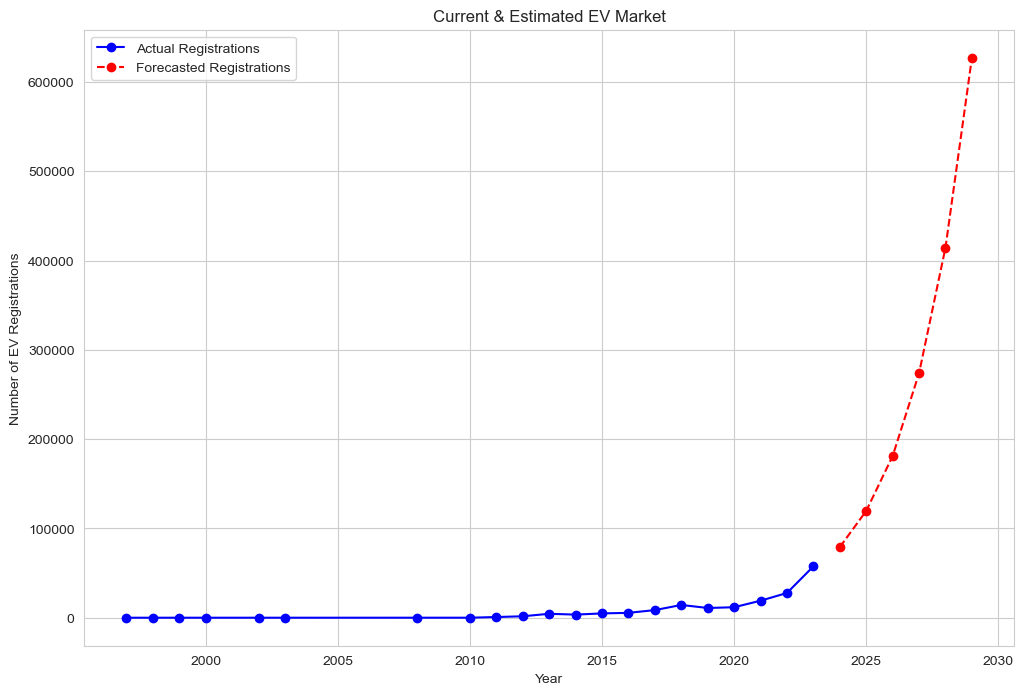

In [47]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()